In [3]:
#raspa tela
import requests
from bs4 import BeautifulSoup
#dataframe
import pandas as pd
#gráficos
import matplotlib.pyplot as plt
#data e hora.
import datetime as dtm
from datetime import date as dt
from unicodedata import normalize as nm

# Requerys

In [4]:
#definir quais anos você quer analisar
AnoInicial=int(input("Informe o Ano inicial: "))
AnoFinal=int(input("Informe o Ano final: "))
print("Lembrando que quanto mais anos, mais demorado será a extração")

Informe o Ano inicial:  2018
Informe o Ano final:  2023


Lembrando que quanto mais anos, mais demorado será a extração


#Importar informação do site da cbf

In [5]:
linkRaiz = 'https://www.cbf.com.br/futebol-brasileiro/competicoes/campeonato-brasileiro-serie-a'
listaLinks = []
ListaFinal = []
jogo=[]

for ano in range(AnoInicial, AnoFinal+1):
    for nj in range(1, 381):
        linkJogo = f"{linkRaiz}/{ano}/{nj}"
        listaLinks.append(linkJogo)
        valorweb = requests.get(linkJogo)
        soup = BeautifulSoup(valorweb.content, 'html.parser')

        
        title = soup.title.text
        jogos=soup.find(class_='color-white block text-1').text
        jogo.append(jogos)
        ListaFinal.append(title)


In [6]:
NumeroJogo=[]
for i in jogo:
    j=i.split('Jogo:')[1].strip()
    NumeroJogo.append(j)

In [7]:
time_casa = []

for partidas in ListaFinal:
    times = partidas.split(' x ')
    timeCasa = times[0].strip()  # Remover espaços extras no início e no final
    nome_time_casa = timeCasa.split(' - ')[0].strip()  # Separar o nome do time da parte do estado
    time_casa.append(nome_time_casa )


In [8]:
time_visitante = []
for partidas in ListaFinal:
    times = partidas.split(' x ')
    timeVisitante = times[1].strip()  # Remover espaços extras no início e no final
    nome_time_visitante = timeVisitante.split(' - ')[0].strip() 
    nome_time_visitante = nome_time_visitante[2:]  # Remover o número no início
    time_visitante.append(nome_time_visitante)



In [9]:
#coletar gols mandante
gols_mandante = []

for gols in ListaFinal:
    gol_mandante = gols.split(' x ')[0].strip()  # Extrair os gols do time da casa
    time = gol_mandante.split(' - ')[1].strip()
    time=time[3:]
    gols_mandante.append(time)

    

In [10]:
#Coletar gols visitante
gols_visitante=[]
for gols in ListaFinal:
    gols_visitantes=gols.split(' x ')[1].strip()
    gols_visitantes=gols_visitantes.split(' - ')[0].strip()
    gols_visitantes=gols_visitantes.split(' ')[0]
    gols_visitante.append(gols_visitantes)



In [11]:
anoJogo=[]
for i in ListaFinal:
    Ano_Jogos=i.split(' x ')[1].strip()
    Ano_Jogos=Ano_Jogos.split(' - ')[3]
    Ano_Jogos=Ano_Jogos[-4:]
    anoJogo.append(Ano_Jogos)



In [12]:
#Determinar resultado
def vitoria(gols_mandante, gols_visitante):
    if gols_mandante > gols_visitante:
        return 'Mandante'
    elif gols_mandante < gols_visitante:
        return 'Visitante'
    else:
        return 'Empate'
resultado=[vitoria(gols_mandante,gols_visitante) for gols_mandante,gols_visitante in zip(gols_mandante,gols_visitante)]

In [13]:
def pontosv(gols_mandante, gols_visitante):
    if gols_mandante > gols_visitante:
        return 3
    elif gols_mandante < gols_visitante:
        return 0
    else:
        return 1
pontuacaom=[pontosv(gols_mandante,gols_visitante) for gols_mandante,gols_visitante in zip(gols_mandante,gols_visitante)]


In [14]:
def pontosm(gols_mandante, gols_visitante):
    if gols_mandante < gols_visitante:
        return 3
    elif gols_mandante > gols_visitante:
        return 0
    else:
        return 1
pontuacaov=[pontosm(gols_mandante,gols_visitante) for gols_mandante,gols_visitante in zip(gols_mandante,gols_visitante)]

In [39]:
data = {'NumeroJogo':NumeroJogo, 'time_casa':time_casa, 'time_visitante':time_visitante,'Gols Mandante':gols_mandante,'Gols Visitante':gols_visitante,'anoJogo':anoJogo,'Quem Venceu?':resultado}
df = pd.DataFrame(data)
df

,NumeroJogo,time_casa,time_visitante,Gols Mandante,Gols Visitante,anoJogo,Quem Venceu?
0,1,Cruzeiro,Grêmio,0,1,2018,Visitante
1,2,Athletico Paranaense,Chapecoense,5,1,2018,Mandante
2,3,America Fc,Sport,3,0,2018,Mandante
3,4,Vitória,Flamengo,2,2,2018,Empate
4,5,Vasco da Gama,Atlético,2,1,2018,Mandante
...,...,...,...,...,...,...,...
2275,376,Cruzeiro Saf,lmeiras,,Palmeiras,2023,Visitante
2276,377,Internacional,tafogo,,Botafogo,2023,Visitante
2277,378,Coritiba S.a.f.,rinthians,,Corinthians,2023,Visitante
2278,379,Bahia,lético Mineiro,,Atlético,2023,Visitante


In [40]:
df['Gols Visitante'] = pd.to_numeric(df['Gols Visitante'], errors='coerce').astype('Int64')
df['Gols Mandante'] = pd.to_numeric(df['Gols Mandante'], errors='coerce').astype('Int64')
df = df.dropna(subset=['Gols Visitante'])
df

,NumeroJogo,time_casa,time_visitante,Gols Mandante,Gols Visitante,anoJogo,Quem Venceu?
0,1,Cruzeiro,Grêmio,0,1,2018,Visitante
1,2,Athletico Paranaense,Chapecoense,5,1,2018,Mandante
2,3,America Fc,Sport,3,0,2018,Mandante
3,4,Vitória,Flamengo,2,2,2018,Empate
4,5,Vasco da Gama,Atlético,2,1,2018,Mandante
...,...,...,...,...,...,...,...
2175,276,Atlético Mineiro,Cruzeiro Saf,0,1,2023,Visitante
2176,277,Internacional,Santos,7,1,2023,Mandante
2177,278,Coritiba S.a.f.,Palmeiras,0,2,2023,Visitante
2178,279,Bahia,Fortaleza,2,0,2023,Mandante


In [41]:
totalgolsM=df['Gols Mandante'].sum()
totalgolsV=df['Gols Visitante'].sum()

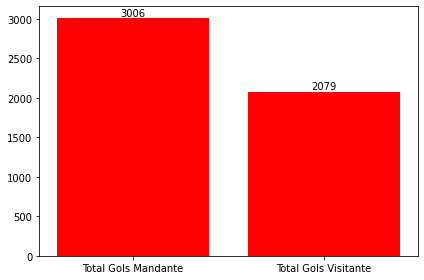

In [42]:
bars = plt.bar(['Total Gols Mandante', 'Total Gols Visitante'], [totalgolsM, totalgolsV], color='red')
# Adicionar os totais como rótulos nas barras
for bar in bars:
    yval = bar.get_height()  # Altura da barra
    plt.text(bar.get_x() + bar.get_width()/2, yval , round(yval), ha='center', va='bottom')
plt.tight_layout()
plt.show()

In [48]:
df.to_excel(f"CampeonatoBrasileiro_Jogos_CBF_{AnoInicial}-{AnoFinal}_SerieA.xlsx", index = False)

C:\Users\aliss\AppData\Local\Temp/ipykernel_76668/4115185689.py:1: UserWarning: Pandas requires version '3.0.3' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  df.to_excel(f"CampeonatoBrasileiro_Jogos_CBF_{AnoInicial}-{AnoFinal}_SerieA.xlsx", index = False)
